<a href="https://colab.research.google.com/github/Srichandan10/Brain-MRI-segmentation/blob/master/BrainMriSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 73 bytes


In [5]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 99% 705M/714M [00:14<00:00, 55.4MB/s]
100% 714M/714M [00:14<00:00, 52.5MB/s]


In [6]:
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_

In [7]:
import glob
import tqdm

import matplotlib.pyplot as plt
import cv2


In [8]:
#seperating training images and mask images
"""
filenames in given path to be in the following format
for images: <case_id>_<slice_number>.tif
 for masks: <case_id>_<slice_number>_mask.tif
"""

imageTr=[]
mask=glob.glob('/content/lgg-mri-segmentation/kaggle_3m/*/*_mask*')

# if we remove 'mask' from mask file we get training file.

for i in mask:
  imageTr.append(i.replace('_mask',''))

print("length of mask files "+str(len(mask)))
print("length of image training files "+str(len(imageTr)))
print(mask[:5])
print(imageTr[:5])



length of mask files 3929
length of image training files 3929
['/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_9_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_22_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_23_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_2_mask.tif']
['/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_17.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_9.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_22.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_23.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5855_19951217/TCGA_

# **Data Visualization**

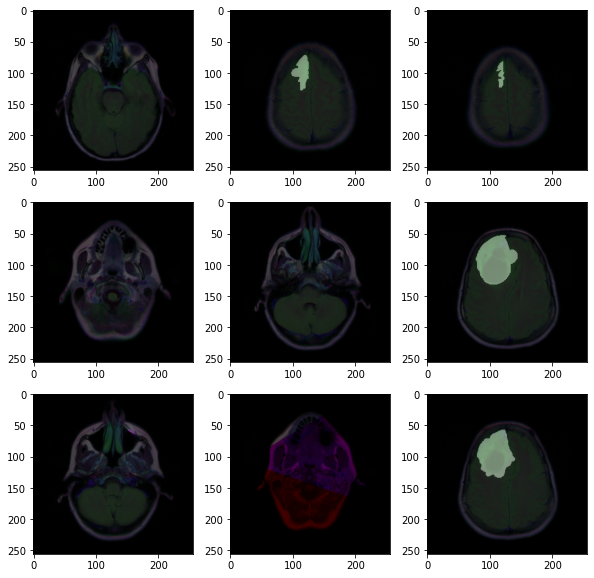

In [40]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=imageTr[i]
    msk_path=mask[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.4)
plt.show()

# Creating data frame and splitting into training and test set

In [27]:
#Set Parameters
im_width = 256
im_height = 256

#create dataframe containing training images files and mask files using panda library
import pandas as pd

df=pd.DataFrame({"file_name":imageTr,"mask_file":mask})

#split the dataframe into training , test and validation set using train_test_split
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,test_size=.15) #split the data into training and test
df_train,df_val=train_test_split(df_train,test_size=.1) #split the training data into training and validation
df_train1,df_train2=train_test_split(df_train,test_size=.3) #splitting the training dataset further to reduce computation
print(df_test.head())
print(df_train1.values.shape)
print(df_test.values.shape)
print(df_val.values.shape)


                                              file_name                                          mask_file
1206  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2942  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
208   /content/lgg-mri-segmentation/kaggle_3m/TCGA_F...  /content/lgg-mri-segmentation/kaggle_3m/TCGA_F...
3793  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...  /content/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3279  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...  /content/lgg-mri-segmentation/kaggle_3m/TCGA_H...
(2103, 2)
(590, 2)
(334, 2)


# Defining loss function

In [12]:
#define dice coefficent
from tensorflow.keras import backend as K

epsilon=1e-6 #small constant add to numerator and denominator to avoid divide by 0 errors.
def dice_coeff(y_pred,y_true):
  y_predf=K.flatten(y_pred)
  y_truef=K.flatten(y_true)
  numerator= 2*K.sum(y_predf*y_truef)+epsilon
  denominator=K.sum(y_predf)+K.sum(y_truef) +epsilon
  return numerator/denominator

def dice_coeff_loss(y_pred,y_true):
  return -dice_coeff(y_pred,y_true)



# Implementing Unet model for segmentation


In [13]:
from tensorflow.keras.layers import Input,Conv2D,BatchNormalization,MaxPooling2D,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model

def Unet(input_size=(256,256,3)):
  input=Input(input_size)
  conv1=Conv2D(32,(3,3),padding='same',activation='relu')(input)
  conv1=BatchNormalization()(conv1)
  conv1=Conv2D(32,(3,3),padding='same',activation='relu')(conv1)
  conv1=BatchNormalization()(conv1)
  pool1=MaxPooling2D(pool_size=(2,2))(conv1)

  conv2=Conv2D(64,(3,3),padding='same',activation='relu')(pool1)
  conv2=BatchNormalization()(conv2)
  conv2=Conv2D(64,(3,3),padding='same',activation='relu')(conv2)
  conv2=BatchNormalization()(conv2)
  pool2=MaxPooling2D(pool_size=(2,2))(conv2)

  conv3=Conv2D(128,(3,3),padding='same',activation='relu')(pool2)
  conv3=BatchNormalization()(conv3)
  conv3=Conv2D(128,(3,3),padding='same',activation='relu')(conv3)
  conv3=BatchNormalization()(conv3)
  pool3=MaxPooling2D(pool_size=(2,2))(conv3)

  conv4=Conv2D(256,(3,3),padding='same',activation='relu')(pool3)
  conv4=BatchNormalization()(conv4)
  conv4=Conv2D(256,(3,3),padding='same',activation='relu')(conv4)
  conv4=BatchNormalization()(conv4)
  pool4=MaxPooling2D(pool_size=(2,2))(conv4)

  conv5=Conv2D(512,(3,3),padding='same',activation='relu')(pool4)
  conv5=BatchNormalization()(conv5)
  conv5=Conv2D(512,(3,3),padding='same',activation='relu')(conv5)
  conv5=BatchNormalization()(conv5)

  up6=Conv2DTranspose(256,(2,2),strides=(2,2),padding='same',activation='relu')(conv5)
  up6=concatenate([up6,conv4],axis=3)
  conv6=Conv2D(256,(3,3),padding='same',activation='relu')(up6)
  conv6=BatchNormalization()(conv6)
  conv6=Conv2D(256,(3,3),padding='same',activation='relu')(conv6)
  conv6=BatchNormalization()(conv6)

  up7=Conv2DTranspose(128,(2,2),strides=(2,2),padding='same',activation='relu')(conv6)
  up7=concatenate([up7,conv3],axis=3)
  conv7=Conv2D(128,(3,3),padding='same',activation='relu')(up7)
  conv7=BatchNormalization()(conv7)
  conv7=Conv2D(128,(3,3),padding='same',activation='relu')(conv7)
  conv7=BatchNormalization()(conv7)

  up8=Conv2DTranspose(64,(2,2),strides=(2,2),padding='same',activation='relu')(conv7)
  up8=concatenate([up8,conv2],axis=3)
  conv8=Conv2D(64,(3,3),padding='same',activation='relu')(up8)
  conv8=BatchNormalization()(conv8)
  conv8=Conv2D(64,(3,3),padding='same',activation='relu')(conv8)
  conv8=BatchNormalization()(conv8)

  up9=Conv2DTranspose(32,(2,2),strides=(2,2),padding='same',activation='relu')(conv8)
  up9=concatenate([up9,conv1],axis=3)
  conv9=Conv2D(32,(3,3),padding='same',activation='relu')(up9)
  conv9=BatchNormalization()(conv9)
  conv9=Conv2D(32,(3,3),padding='same',activation='relu')(conv9)
  conv9=BatchNormalization()(conv9)

  conv10=Conv2D(1,(1,1),padding='same',activation='sigmoid')(conv9)

  return Model(inputs=input,outputs=[conv10])




In [14]:
model=Unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 9248        batch_normalization[0][0]        
______________________________________________________________________________________________

# Creating Data generator for image and mask

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
def data_generator(dataframe,aug_dict,target_size,batch_size,seed):

  image_datagen=ImageDataGenerator(**aug_dict)
  mask_datagen=ImageDataGenerator(**aug_dict)

    
  image_datagenerator=image_datagen.flow_from_dataframe(dataframe,
                                                        x_col='file_name',
                                                        class_mode=None,
                                                        color_mode='rgb',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        save_prefix='image',
                                                        seed=seed)

  mask_datagenerator=mask_datagen.flow_from_dataframe(dataframe,
                                                        x_col='mask_file',
                                                        class_mode=None,
                                                        color_mode='grayscale',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        save_prefix='mask',
                                                        seed=seed)
  
  data_gen=zip(image_datagenerator,mask_datagenerator)
  for (image,mask) in data_gen:
    img,mask=adjust_data(image,mask)
    yield (img,mask)

def adjust_data(image,mask):
  image=image/255
  mask=mask/255
  mask[mask>0.5]=1
  mask[mask<=0.5]=0
  return (image,mask)


# Training the model

In [28]:
#parameters for data augmentation
aug_dict=dict(rotation_range=.2,
          width_shift_range=0.05,
          height_shift_range=0.05,
          shear_range=0.05,
          zoom_range=0.05,
         horizontal_flip=True,
          fill_mode='nearest')
EPOCHS = 70
BATCH_SIZE = 32
learning_rate = 1e-4
target_size=(im_height,im_width)

training=data_generator(df_train1,aug_dict,target_size,batch_size=BATCH_SIZE,seed=1)
validation=data_generator(df_val,dict(),target_size,batch_size=BATCH_SIZE,seed=1)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model=Unet(input_size=(im_height,im_width,3))
model.compile(optimizer=Adam(learning_rate,decay=learning_rate/EPOCHS),loss=dice_coeff_loss,metrics=[dice_coeff,'binary_accuracy',tf.keras.metrics.MeanIoU(num_classes=2)])

callbacks = [ModelCheckpoint('unet_brain_mri_seg.hdf5', verbose=1, save_best_only=True)]
history=model.fit(training,
                  epochs=EPOCHS,
                  callbacks=callbacks,
                  validation_data=validation,
                  steps_per_epoch=len(df_train)/BATCH_SIZE,
                  validation_steps=len(df_val)/BATCH_SIZE
                  )


Found 2103 validated image filenames.
Found 2103 validated image filenames.
Epoch 1/70
94/93 [==============================] - ETA: 0s - loss: -0.0566 - dice_coeff: 0.0566 - binary_accuracy: 0.7160 - mean_io_u_5: 0.4948Found 334 validated image filenames.
Found 334 validated image filenames.

Epoch 00001: val_loss improved from inf to -0.01940, saving model to unet_brain_mri_seg.hdf5
94/93 [==============================] - 111s 1s/step - loss: -0.0566 - dice_coeff: 0.0566 - binary_accuracy: 0.7160 - mean_io_u_5: 0.4948 - val_loss: -0.0194 - val_dice_coeff: 0.0193 - val_binary_accuracy: 0.0091 - val_mean_io_u_5: 0.4955
Epoch 2/70
94/93 [==============================] - ETA: 0s - loss: -0.0851 - dice_coeff: 0.0850 - binary_accuracy: 0.8687 - mean_io_u_5: 0.4990
Epoch 00002: val_loss did not improve from -0.01940
94/93 [==============================] - 107s 1s/step - loss: -0.0851 - dice_coeff: 0.0850 - binary_accuracy: 0.8687 - mean_io_u_5: 0.4990 - val_loss: -0.0178 - val_dice_coeff

# Plotting loss and accuracy graph

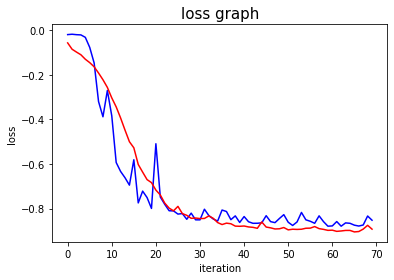

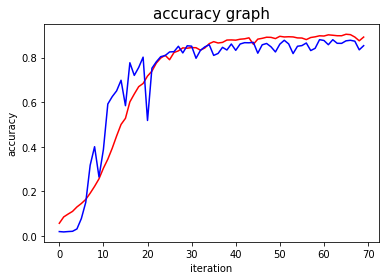

In [30]:
a = history.history

list_traindice = a['dice_coeff']
list_testdice = a['val_dice_coeff']

list_trainjaccard = a['mean_io_u_5']
list_testjaccard = a['val_mean_io_u_5']

list_trainloss = a['loss']
list_testloss = a['val_loss']
plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_traindice, 'r-')
plt.plot(list_testdice, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

# Saving the weights of the model

In [31]:
from tensorflow.keras.models import Model, load_model, save_model
model = load_model('unet_brain_mri_seg.hdf5', custom_objects={'dice_coeff_loss': dice_coeff_loss, 'iou':tf.keras.metrics.MeanIoU(num_classes=2), 'dice_coeff': dice_coeff})

# Evaluating the model on the test set

In [36]:
test_gen = data_generator(df_test,batch_size= BATCH_SIZE,
                                aug_dict=dict(),
                                target_size=(im_height, im_width),seed=1)
results = model.evaluate(test_gen, steps=len(df_test) / BATCH_SIZE)
print("Test lost: ",results[0])
print("Test IOU: ",results[3])
print("Test Dice Coefficent: ",results[1])

Found 590 validated image filenames.
Found 590 validated image filenames.
19/18 [==============================] - 4s 216ms/step - loss: -0.8905 - dice_coeff: 0.8920 - binary_accuracy: 0.9979 - mean_io_u_5: 0.9033
Test lost:  -0.8904610276222229
Test IOU:  0.9032577872276306
Test Dice Coefficent:  0.8920415639877319


# Visualization of predicted result by the model

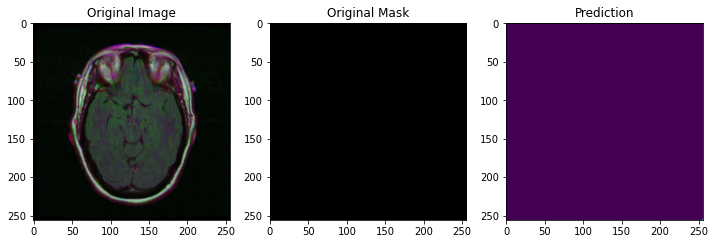

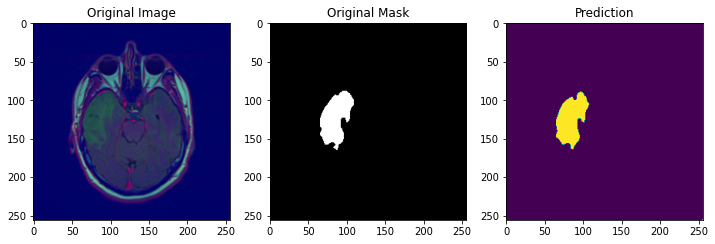

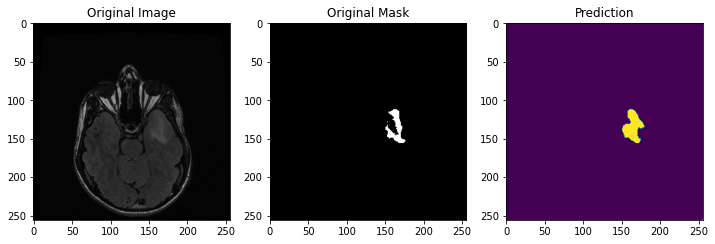

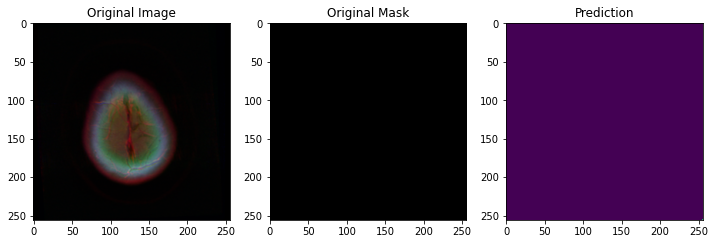

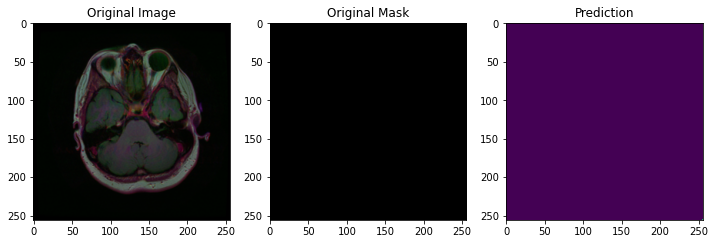

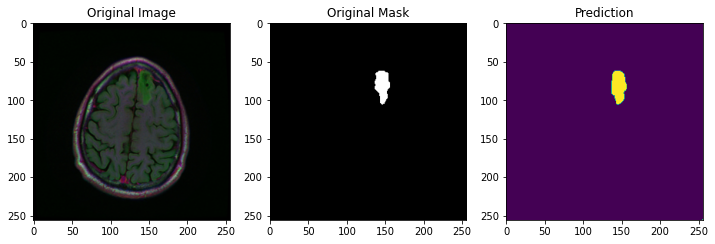

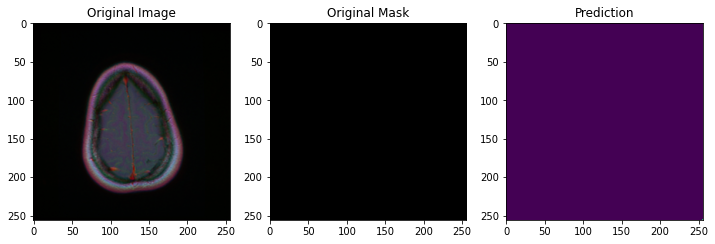

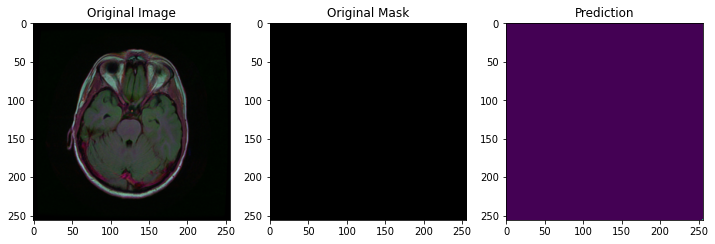

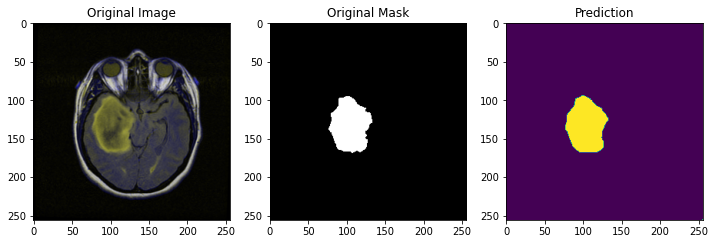

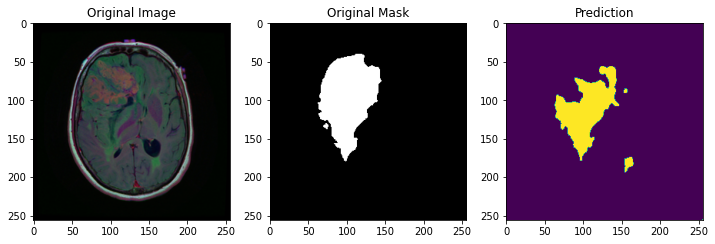

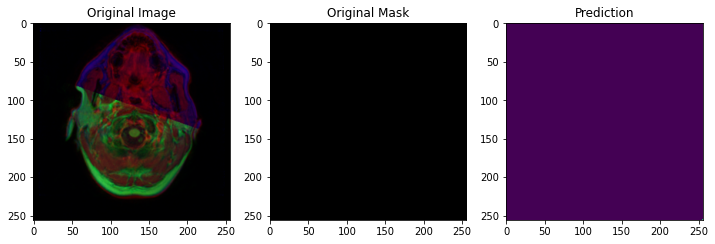

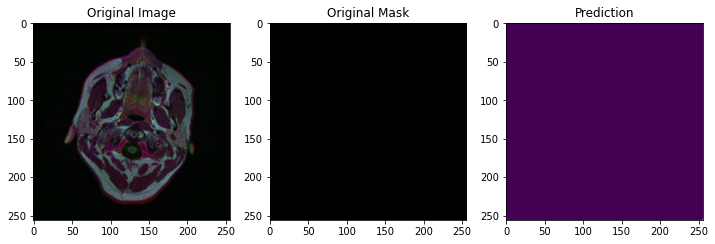

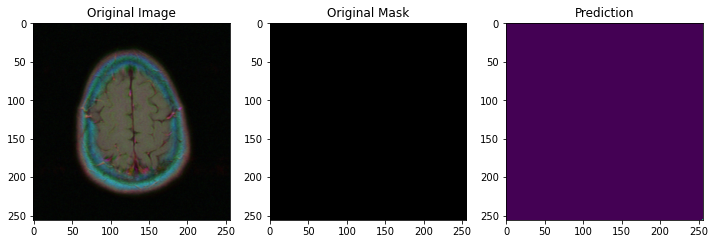

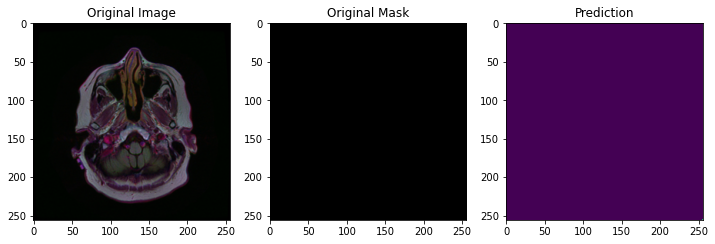

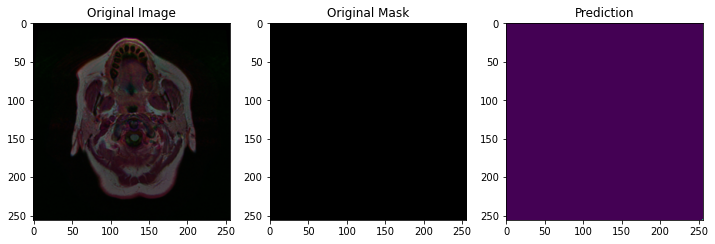

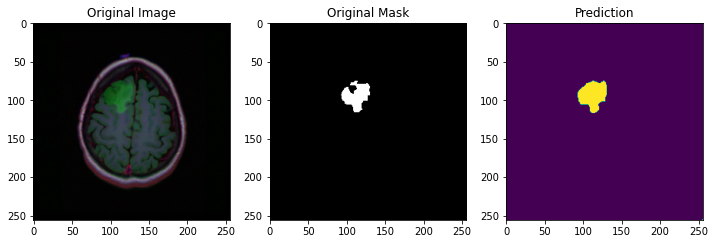

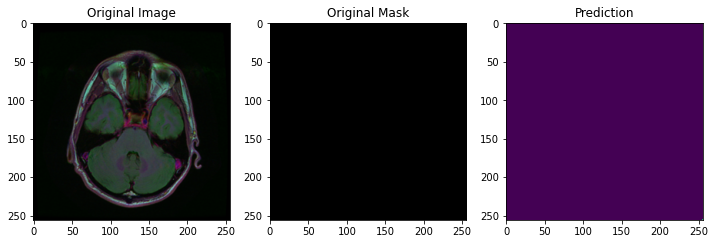

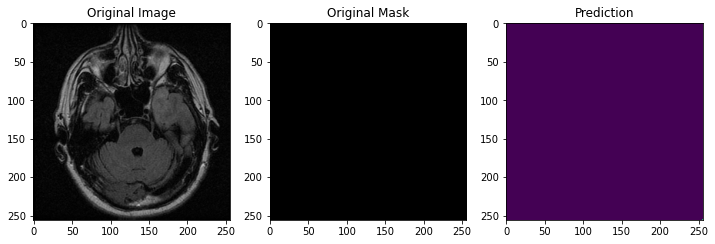

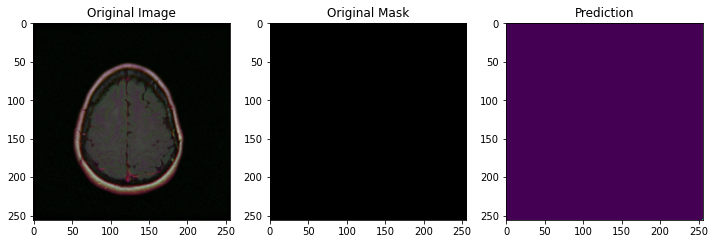

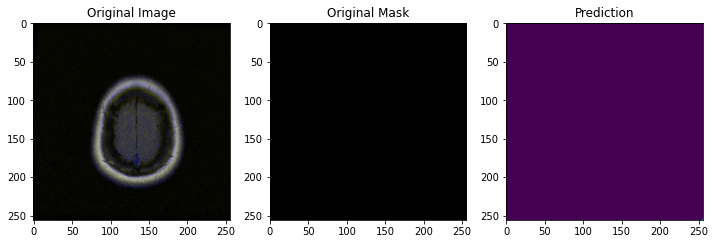

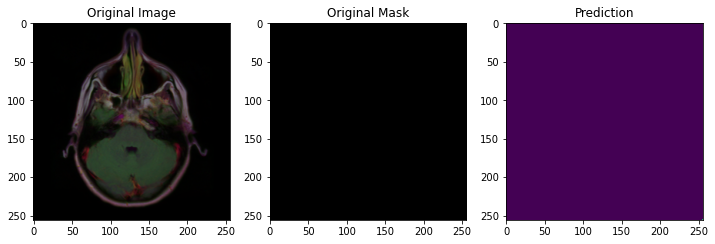

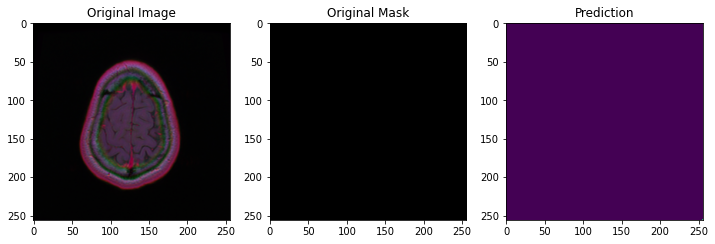

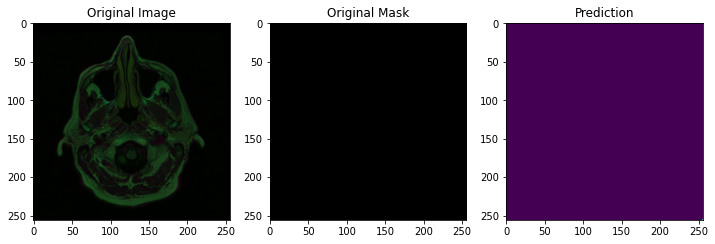

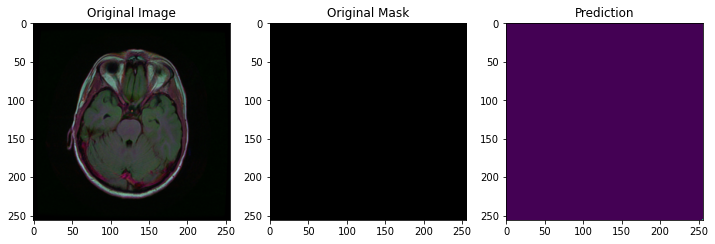

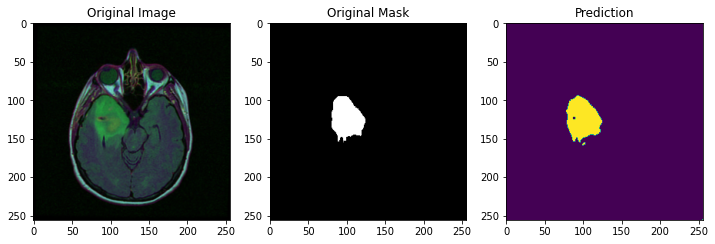

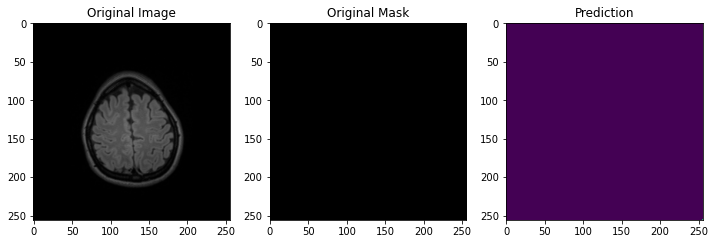

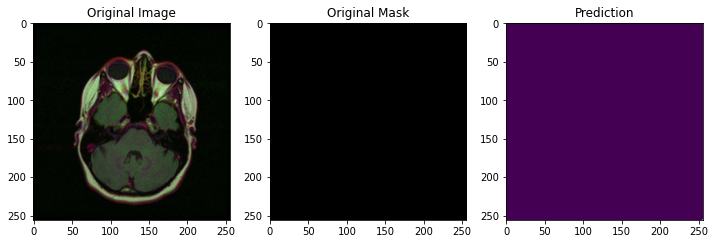

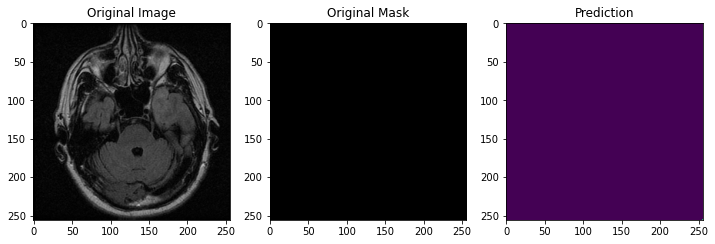

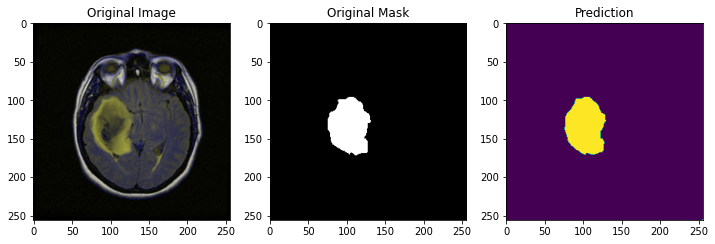

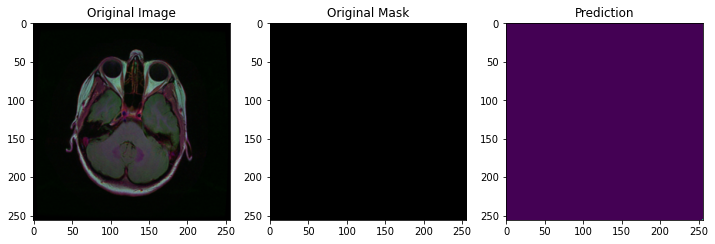

In [37]:
import numpy as np
for i in range(30):
    index=np.random.randint(1,len(df_test.index))
    img = cv2.imread(df_test['file_name'].iloc[index])
    img = cv2.resize(img ,(im_height, im_width))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(df_test['mask_file'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()